#### importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

#### loading data

In [2]:
df = pd.read_csv("Iris.csv")

#### data cleaning


In [5]:
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
flowers = {
    0 : "Iris-setosa",
    1 : "Iris-versicolor",
    2 : "Iris-virginica"
}

In [15]:
le = LabelEncoder()
df_dup = df
df_dup.Species = le.fit_transform(df_dup.Species)
df_dup

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### data visualization

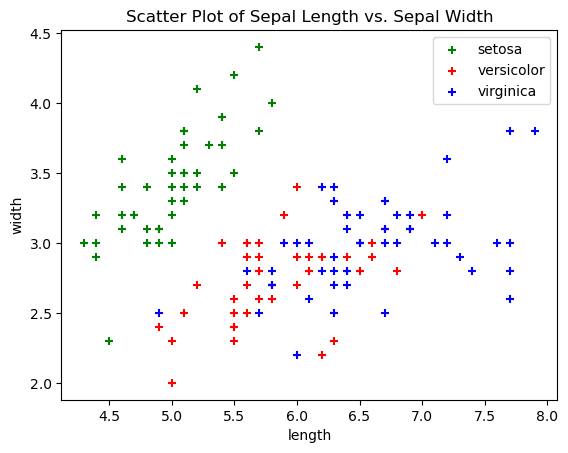

In [10]:
df1 = df[df['Species'] == 0]
df2 = df[df['Species'] == 1]
df3 = df[df['Species'] == 2]

plt.scatter(df1['SepalLengthCm'], df1['SepalWidthCm'], marker="+", color="green",label = "setosa")
plt.scatter(df2['SepalLengthCm'], df2['SepalWidthCm'], marker="+", color="red",label = "versicolor")
plt.scatter(df3['SepalLengthCm'], df3['SepalWidthCm'], marker="+", color="blue",label = "virginica")
plt.xlabel('length')
plt.ylabel("width")
plt.title('Scatter Plot of Sepal Length vs. Sepal Width')
plt.legend()
plt.show()

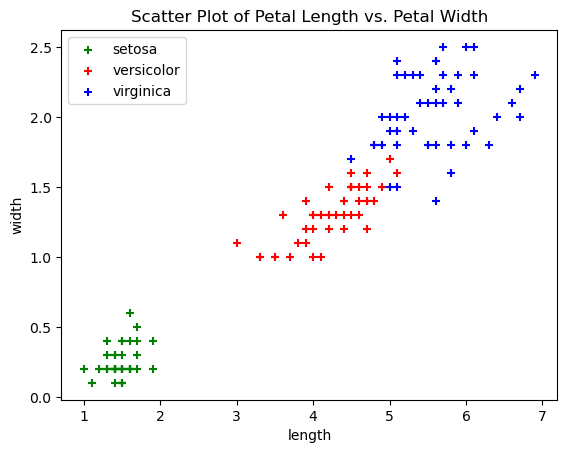

In [17]:
plt.scatter(df1['PetalLengthCm'], df1['PetalWidthCm'], marker="+", color="green",label = "setosa")
plt.scatter(df2['PetalLengthCm'], df2['PetalWidthCm'], marker="+", color="red",label = "versicolor")
plt.scatter(df3['PetalLengthCm'], df3['PetalWidthCm'], marker="+", color="blue",label = "virginica")
plt.xlabel('length')
plt.ylabel("width")
plt.title('Scatter Plot of Petal Length vs. Petal Width')
plt.legend()
plt.show()

#### train & test split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(df_dup[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]],df_dup.Species,test_size = 0.3)

In [19]:
len(x_train)

105

In [20]:
len(x_test)

45

In [21]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
31,5.4,3.4,1.5,0.4
123,6.3,2.7,4.9,1.8
36,5.5,3.5,1.3,0.2
117,7.7,3.8,6.7,2.2
115,6.4,3.2,5.3,2.3
142,5.8,2.7,5.1,1.9
144,6.7,3.3,5.7,2.5
93,5.0,2.3,3.3,1.0
91,6.1,3.0,4.6,1.4
77,6.7,3.0,5.0,1.7


#### machine learning model

In [22]:
reg = LogisticRegression(solver = 'lbfgs',max_iter = 1000)
reg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [23]:
reg.score(x_test,y_test)

0.9777777777777777

In [26]:
y_predicted = reg.predict(x_test)
y_predicted

array([0, 2, 0, 2, 2, 2, 2, 1, 1, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 1, 0, 1,
       1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0,
       2], dtype=int64)

In [27]:
y_test

31     0
123    2
36     0
117    2
115    2
142    2
144    2
93     1
91     1
77     1
4      0
71     1
129    2
118    2
13     0
48     0
97     1
43     0
101    2
79     1
46     0
84     1
86     1
114    2
74     1
81     1
138    2
16     0
30     0
5      0
60     1
7      0
68     1
22     0
111    2
20     0
132    2
124    2
3      0
140    2
12     0
9      0
143    2
28     0
104    2
Name: Species, dtype: int64

In [16]:
cross_val_score(reg,df_dup,df_dup.Species)

array([0.7, 1. , 1. , 1. , 0.7])

#### confusion matrix

Text(33.22222222222222, 0.5, 'Truth')

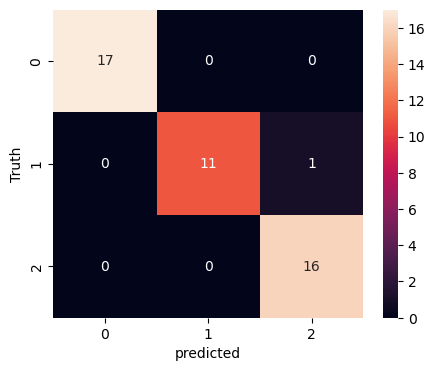

In [28]:
cm = confusion_matrix(y_test,y_predicted)
cm
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot = True)
plt.xlabel('predicted')
plt.ylabel('Truth')